In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [3]:
df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on='driverId', how='left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')

In [4]:
df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], axis=1, inplace=True)
df.rename(columns = {'rank':'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name', 'nationality_y': 'constructor_nationality', 'driverRef': 'driver'}, inplace=True)

In [8]:
df = df[['year','gp_name','round','driver','constructor_name','grid','positionOrder','points','time',
         'milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed',
        'driver_nationality','constructor_nationality']]
# drop the 2019 season because it is incomplete data
df = df[df['year']!=2019]
df = df.sort_values(by=['year','round','positionOrder'], ascending=[False, True, True])
df.head()

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584,1,1:34.570,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182,3,1:35.740,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259,5,1:36.228,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795,6,1:36.302,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338,8,1:36.623,201.641,Danish,American


In [9]:
# replacing \N with NaN
df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)

In [10]:
# changing datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [11]:
df.reset_index(drop=True, inplace=True)
df.shape

(25420, 15)

In [13]:
# using this allows us to visualize over-arching trends in the data and understand extremes as well.
df.describe()

,year,round,grid,positionOrder,points,milliseconds,fastest_lap_rank,fastestLapSpeed
count,25420.000000,25420.000000,25420.000000,25420.000000,25420.000000,6.891000e+03,7171.000000,6963.000000
mean,1989.776790,8.342801,11.199607,12.915264,1.823881,6.247727e+06,10.415702,202.787613
std,19.145653,4.926402,7.263399,7.734311,4.078266,1.696740e+06,6.183839,21.373248
min,1950.000000,1.000000,0.000000,1.000000,0.000000,2.070710e+05,0.000000,89.540000
25%,1976.000000,4.000000,5.000000,6.000000,0.000000,5.416865e+06,5.000000,192.483500
50%,1990.000000,8.000000,11.000000,12.000000,0.000000,5.826948e+06,10.000000,204.091000
75%,2006.000000,12.000000,17.000000,19.000000,2.000000,6.440750e+06,16.000000,215.820000
max,2022.000000,22.000000,34.000000,39.000000,50.000000,1.509054e+07,24.000000,257.320000


In [16]:
drivers_in_order = df.loc[df['positionOrder'] == 1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
drivers_in_order.rename(columns = {'positionOrder':'wins'}, inplace=True)
drivers_in_order

,driver,wins
0,hamilton,92
1,michael_schumacher,91
2,vettel,52
3,prost,51
4,senna,41
...,...,...
108,kubica,1
109,rathmann,1
110,fagioli,1
111,alesi,1


In [17]:
top10 = drivers_in_order.head(10)

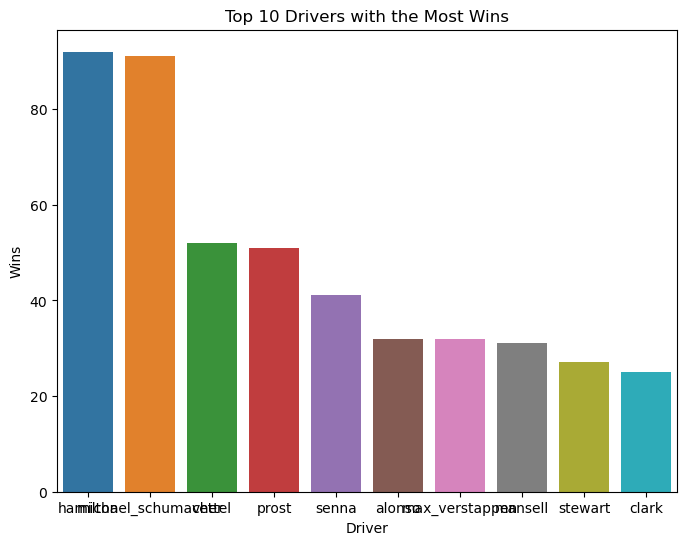

In [19]:
# make a bar plot of the top 10 drivers with the most wins
plt.figure(figsize=(8,6))
sns.barplot(x='driver', y='wins', data=top10)
plt.title('Top 10 Drivers with the Most Wins')
plt.xlabel('Driver')
plt.ylabel('Wins')
plt.show()

In [21]:
constructors_in_order = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
constructors_in_order.rename(columns = {'positionOrder':'wins'}, inplace=True)

In [22]:
top10_constructors = constructors_in_order.head(10)

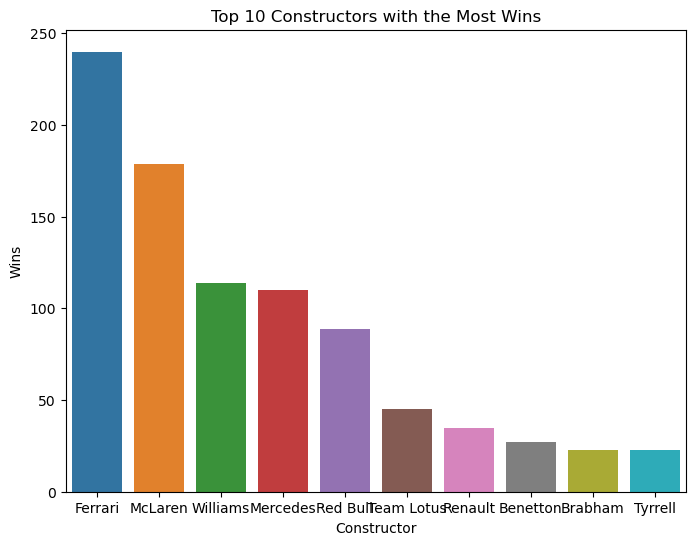

In [23]:
# make a bar plot of the top 10 constructors
plt.figure(figsize=(8,6))
sns.barplot(x='constructor_name', y='wins', data=top10_constructors)
plt.title('Top 10 Constructors with the Most Wins')
plt.xlabel('Constructor')
plt.ylabel('Wins')
plt.show()

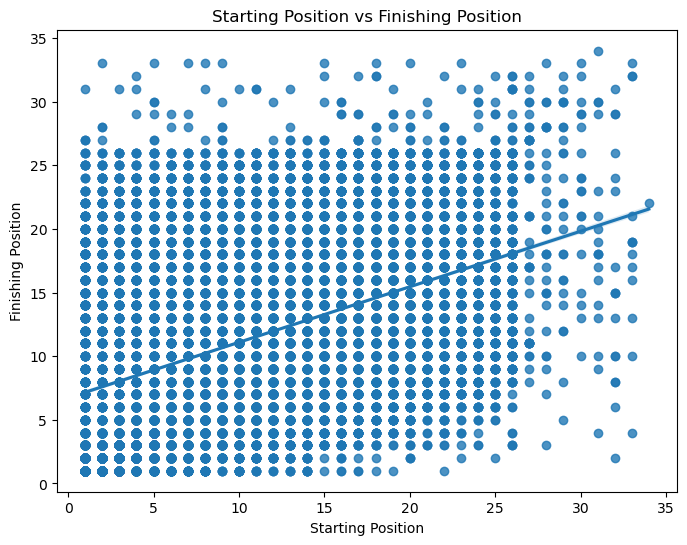

In [25]:
# remove 0s from the dataset
df_without_zeros = df[df['grid']!=0]
# create a reg plot of starting position vs finishing position
plt.figure(figsize=(8,6))
sns.regplot(x='grid', y='positionOrder', data=df_without_zeros)
plt.title('Starting Position vs Finishing Position')
plt.xlabel('Starting Position')
plt.ylabel('Finishing Position')
plt.show()

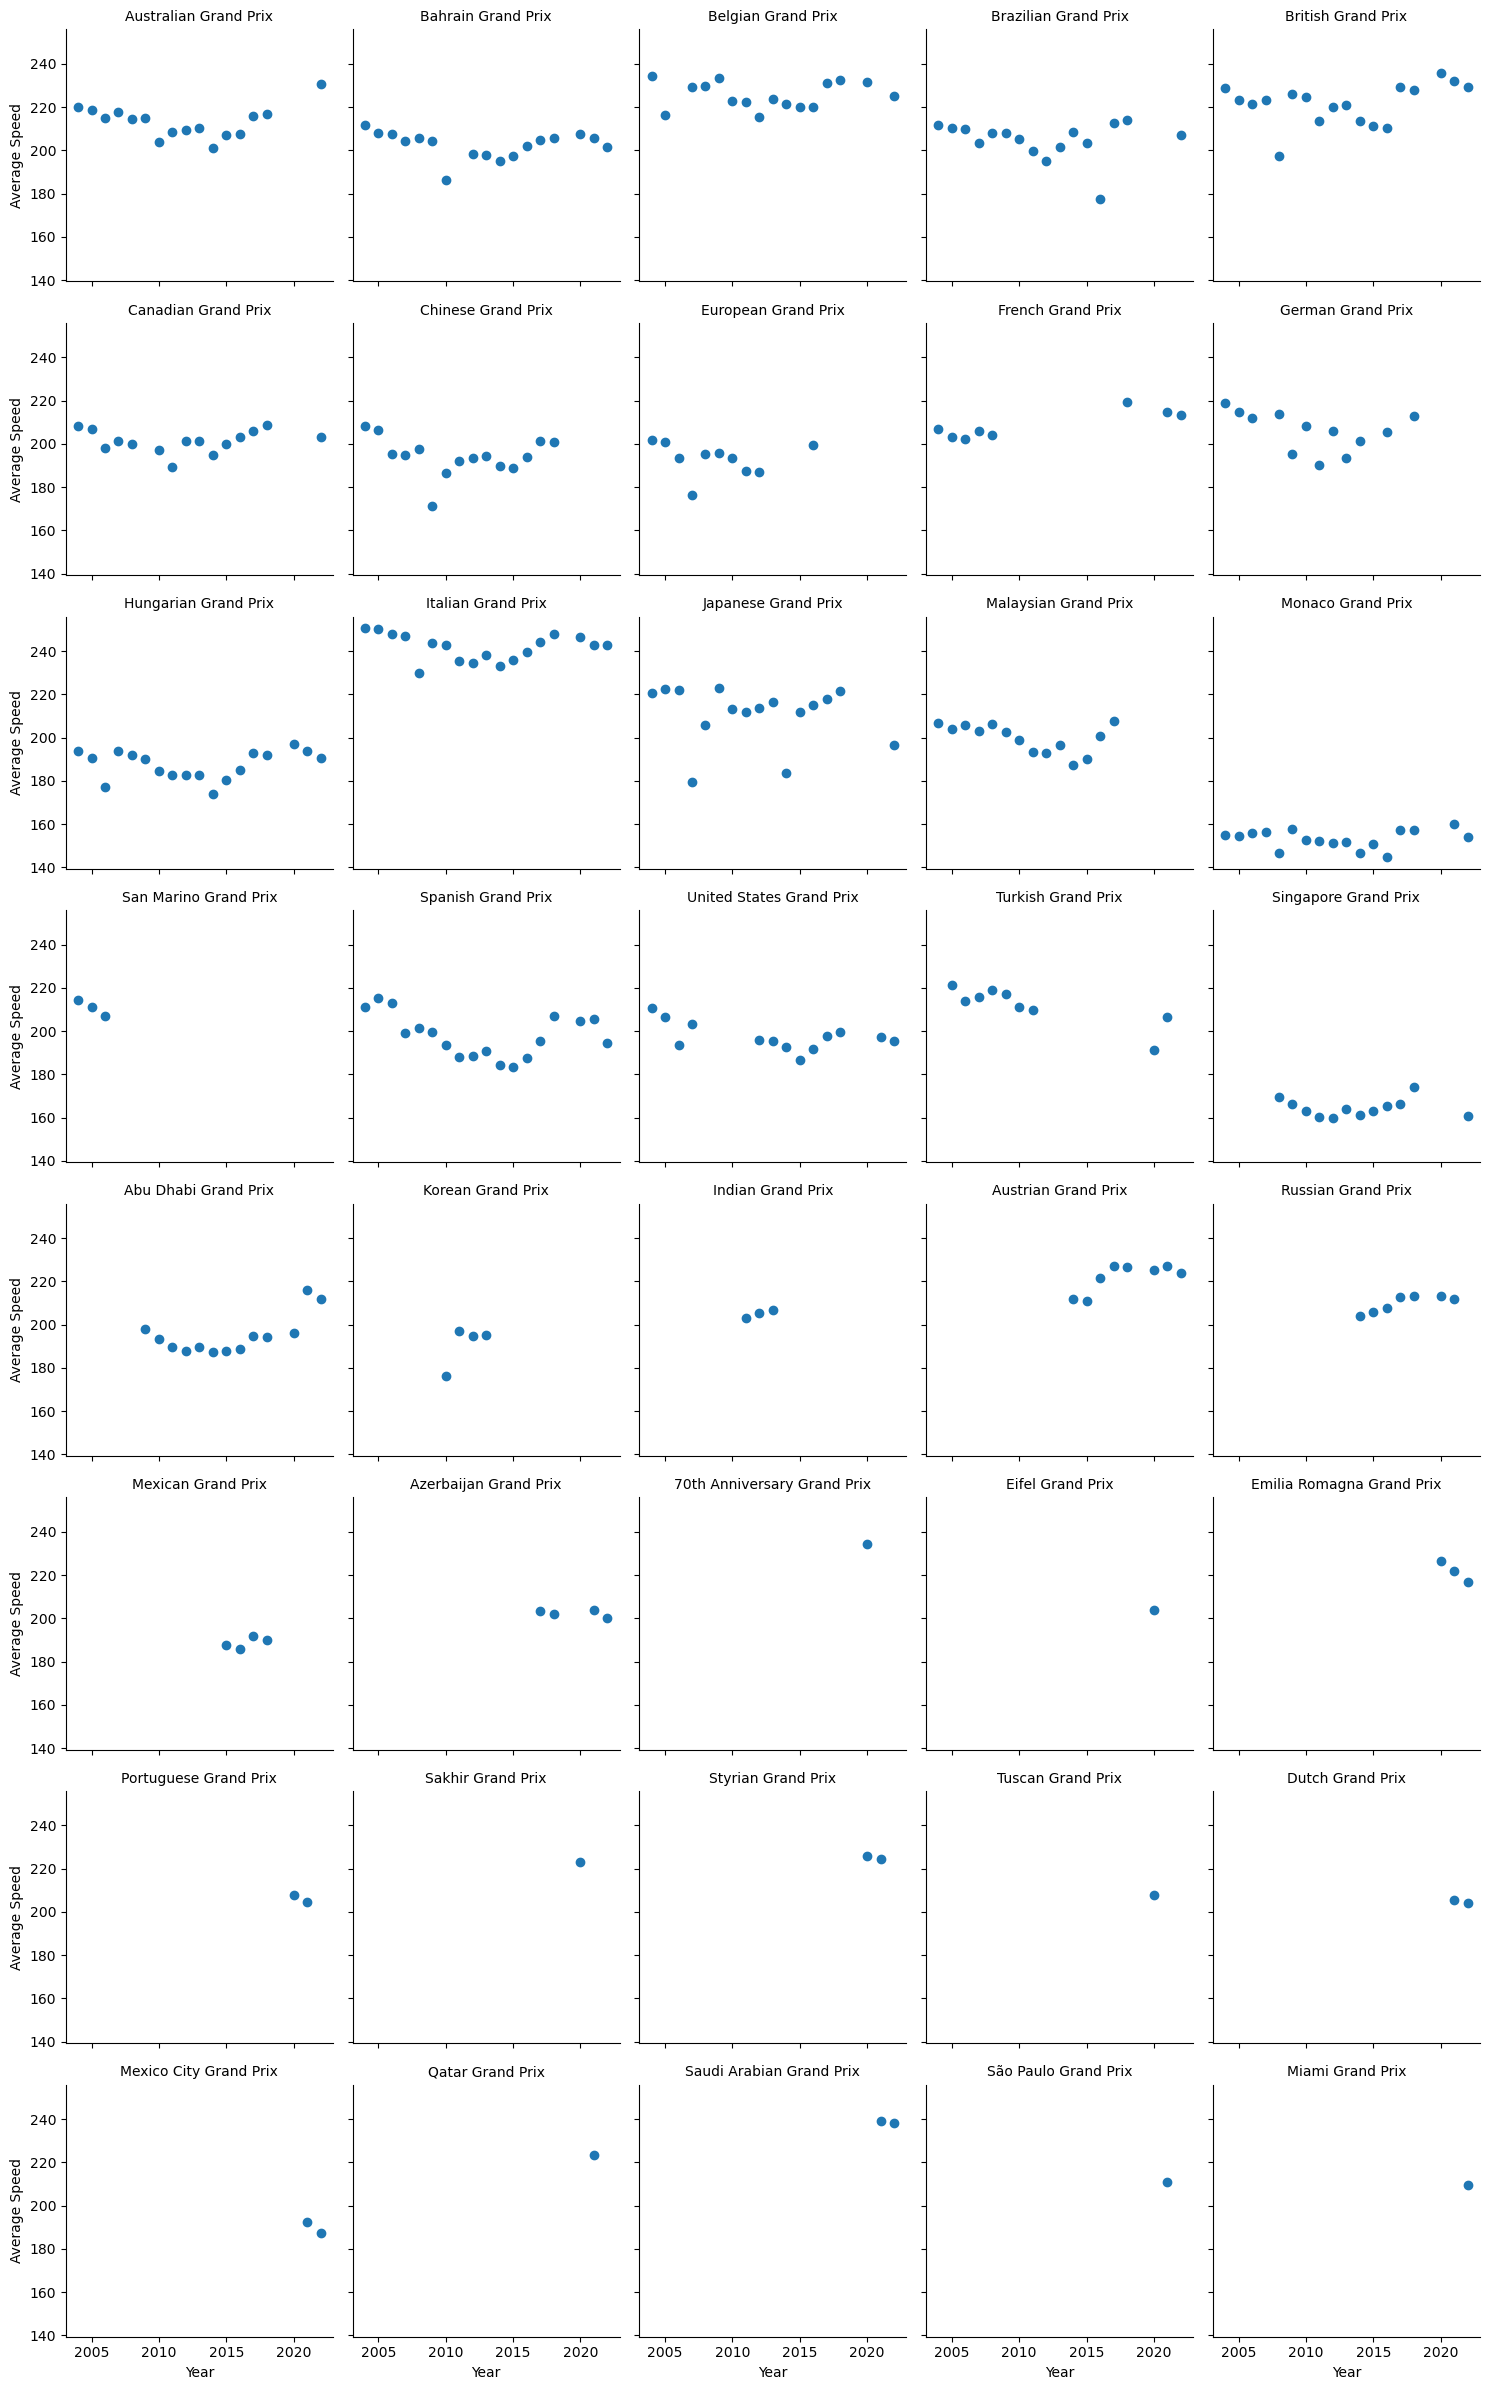

In [27]:
# visualize average fastest speeds during each race
df_speed = df[df['year'] >= 2004]
df_speed_grouped = df_speed.groupby(['year','gp_name'])['fastestLapSpeed'].mean().to_frame().reset_index()
df_speed_grouped.rename(columns = {'fastestLapSpeed':'avg_speed'}, inplace=True)

p = sns.FacetGrid(df_speed_grouped, col='gp_name', col_wrap=5)
p.map(plt.scatter, 'year', 'avg_speed')
p.set_titles('{col_name}')
p.set_xlabels('Year')
p.set_ylabels('Average Speed')
plt.show()